In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load Dataset

In [ ]:
df_user_path = '/content/drive/MyDrive/Twibot-20/dataframes/processed_dataset.pickle'
df_user = pd.read_pickle(df_user_path)

In [ ]:
print(df_user.columns)

Index(['public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'verified',
       'label', 'Number', 'RT', 'Links_mean', 'Links_std', 'Hashtags_mean',
       'Hashtags_std', 'Mentions_mean', 'Mentions_std', 'Words_mean',
       'Words_std'],
      dtype='object')


In [ ]:
df_user = df_user.drop('Number', axis = 1)
#df_user = df_user.drop('verified', axis = 1)
df_user = df_user.drop(['RT', 'Links_mean', 'Links_std', 'Hashtags_mean', 'Hashtags_std',
                        'Mentions_mean', 'Mentions_std', 'Words_mean', 'Words_std'], axis = 1)
print(df_user.columns)

Index(['public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count', 'verified',
       'label'],
      dtype='object')


# Use Random Forest to Predict Human or Bot

## Split train and test

In [ ]:
TRAIN_SPLIT = 0.7
stop_point = int(len(df_user)*TRAIN_SPLIT)
df_train = df_user.iloc[:stop_point]
df_test = df_user.iloc[stop_point:]

df_train.head()

,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,verified,label
u17461978,15349596.0,692.0,9798.0,45568.0,1.0,human
u17685258,762839.0,475.0,5518.0,3201.0,1.0,human
u15750898,327587.0,4801.0,192876.0,1744.0,1.0,human
u1659167666,13324.0,647.0,103.0,44.0,0.0,bot
u34743251,12601567.0,96.0,4879.0,26952.0,1.0,human


In [ ]:
train_features = df_train.drop(['label'], axis=1)
train_labels = df_train['label']

test_features = df_test.drop('label', axis=1)
test_labels = df_test['label']
train_labels

u17461978              human
u17685258              human
u15750898              human
u1659167666              bot
u34743251              human
                       ...  
u305301343               bot
u1630890068            human
u713519580757536769      bot
u93345260                bot
u1749309397              bot
Name: label, Length: 8222, dtype: object

## Function to Train on Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def train_and_pred(model):

  print('Training...' + str(model))
  # fit model
  model.fit(train_features, train_labels)

  test_pred = model.predict(test_features)

  # get accuracy
  accuracy = accuracy_score(test_labels, test_pred)
  print('accuracy: %f' % accuracy)

  # get precision
  precision = precision_score(test_labels, test_pred, pos_label="bot")
  print('precision: %f' % precision)

  # get recall
  recall = recall_score(test_labels, test_pred, pos_label="bot")
  print('recall: %f' % recall)

  # get f1
  f1 = f1_score(test_labels, test_pred, pos_label="bot")
  print('f1: %f' % f1)
   
  return {'accuracy': accuracy,'precision' : precision, 'recall': recall, 'f1':f1}

## Train and test here for accuracy

In [ ]:
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}
accuracies = {model: 0 for model in models}
for model in models:
  accuracies[model] = train_and_pred(models[model])

# testing_estimators = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# accuracies = {estimator: 0 for estimator in testing_estimators}
# for estimators in testing_estimators:
#   model = AdaBoostClassifier(n_estimators=estimators)
#   accuracies[estimators] = train_and_pred(model)
accuracies

Training...RandomForestClassifier()
accuracy: 0.796822
precision: 0.752809
recall: 0.936820
f1: 0.834795
Training...AdaBoostClassifier()
accuracy: 0.807889
precision: 0.742459
recall: 0.994303
f1: 0.850122
Training...DecisionTreeClassifier()
accuracy: 0.744325
precision: 0.764918
recall: 0.770067
f1: 0.767484
Training...MLPClassifier()
accuracy: 0.668842
precision: 0.744558
recall: 0.602279
f1: 0.665903
Training...KNeighborsClassifier()
accuracy: 0.711691
precision: 0.708618
recall: 0.804764
f1: 0.753637


{'RandomForestClassifier': {'accuracy': 0.7968217934165721,
  'precision': 0.7528089887640449,
  'recall': 0.9368203003625065,
  'f1': 0.8347946469773881},
 'AdaBoostClassifier': {'accuracy': 0.80788876276958,
  'precision': 0.7424593967517401,
  'recall': 0.9943034697048162,
  'f1': 0.8501217622315695},
 'DecisionTreeClassifier': {'accuracy': 0.7443246311010215,
  'precision': 0.7649176954732511,
  'recall': 0.7700673226307613,
  'f1': 0.7674838709677421},
 'MLPClassifier': {'accuracy': 0.6688422247446084,
  'precision': 0.7445582586427657,
  'recall': 0.6022786121180735,
  'f1': 0.6659032350415116},
 'KNeighborsClassifier': {'accuracy': 0.7116912599318955,
  'precision': 0.7086183310533516,
  'recall': 0.8047643707923355,
  'f1': 0.7536372453928225}}

### Plot results of training

In [ ]:
data = accuracies

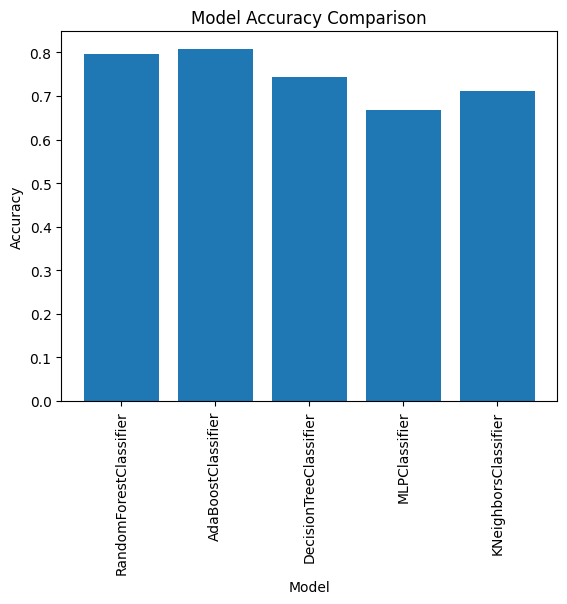

In [ ]:
import matplotlib.pyplot as plt

# Extract the accuracy values from the dictionary
acc_values = [data['accuracy'] for data in data.values()]

# Create a bar chart
plt.bar(list(data.keys()), acc_values)

# Add chart titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-labels
plt.xticks(rotation='vertical')

# Display the chart
plt.show()


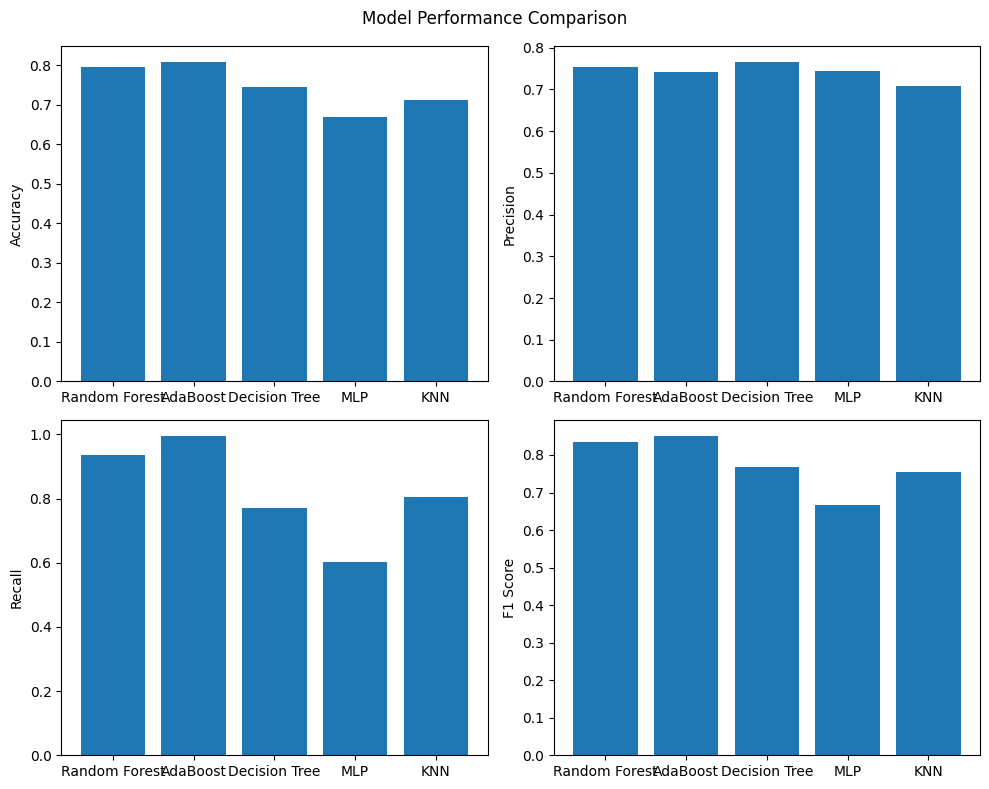

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics for each model
models = list(data.keys())
accuracy = [data[model]['accuracy'] for model in models]
precision = [data[model]['precision'] for model in models]
recall = [data[model]['recall'] for model in models]
f1 = [data[model]['f1'] for model in models]

# Set the x-axis labels and positions
labels = ['Random Forest', 'AdaBoost', 'Decision Tree', 'MLP', 'KNN']
x_pos = np.arange(len(labels))

# Create the subplots for each metric
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Accuracy plot
axs[0, 0].bar(x_pos, accuracy)
axs[0, 0].set_xticks(x_pos)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')

# Precision plot
axs[0, 1].bar(x_pos, precision)
axs[0, 1].set_xticks(x_pos)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')

# Recall plot
axs[1, 0].bar(x_pos, recall)
axs[1, 0].set_xticks(x_pos)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')

# F1 plot
axs[1, 1].bar(x_pos, f1)
axs[1, 1].set_xticks(x_pos)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')

# Set the title and layout
fig.suptitle('Model Performance Comparison')
fig.tight_layout()

# Show the plot
plt.show()

#Feature Importances

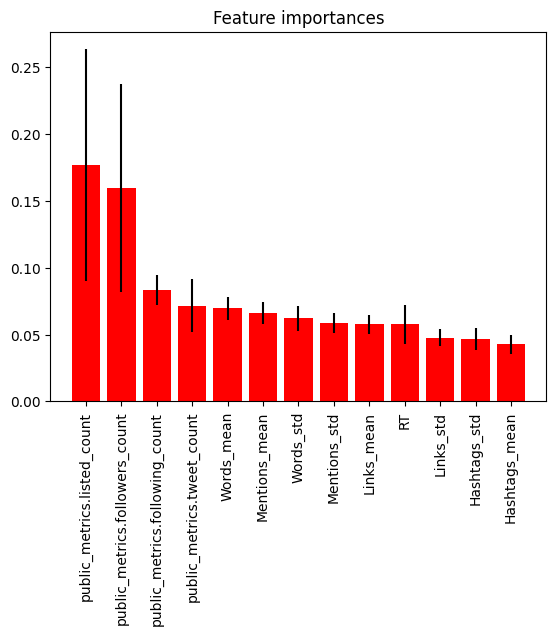

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_features, train_labels)
test_pred = rfc.predict(test_features)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), train_features.columns[indices], rotation=90)
plt.xlim([-1, train_features.shape[1]])
plt.show()
